In [1]:
import json
import pandas
import order_independent_llm
import glob
import seaborn
import matplotlib.pyplot as plt

In [2]:
targets = glob.glob("../results/mmlu/*/*.jsonl")

In [3]:
df = pandas.concat([order_independent_llm.load_to_dataframe(t,fail_on_empty=False) for t in targets])

In [4]:
df['category'] = df['file_name'].apply(lambda x : x.split('-')[-1])

In [5]:
df_piv_c = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).count().reset_index().pivot(
    index = 'model',
    columns='response_type',
    values='is_correct_answer'
)[['normal', 'order_independent', 'normal_reversed', 'only_parallel_attention',
       'only_parallel_attention_reversed', 'only_parallel_position',
       'only_parallel_position_reversed']]
df_piv_c

response_type,normal,order_independent,normal_reversed,only_parallel_attention,only_parallel_attention_reversed,only_parallel_position,only_parallel_position_reversed
model,,,,,,,
WizardLM/WizardLM-7B-V1.0,4417,4417,4417,4417,4417,4417,4417
gpt2,10304,10304,10304,10304,10304,10304,10304
lmsys/vicuna-7b-v1.5,920,920,920,920,920,920,920
meta-llama/Llama-2-13b-chat-hf,1009,1009,1009,1009,1009,1009,1009
meta-llama/Llama-2-13b-hf,2583,2583,2583,2583,2583,2583,2583
meta-llama/Llama-2-7b-chat-hf,2940,2940,2940,2940,2940,2940,2940
meta-llama/Llama-2-7b-hf,4423,4423,4423,4423,4423,4423,4423


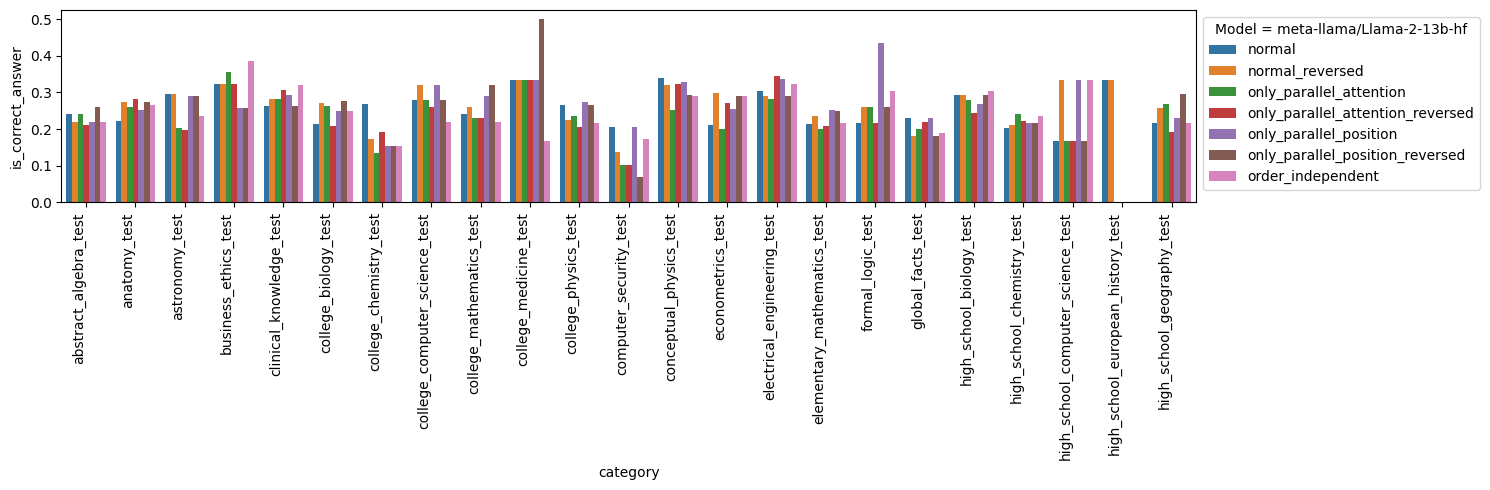

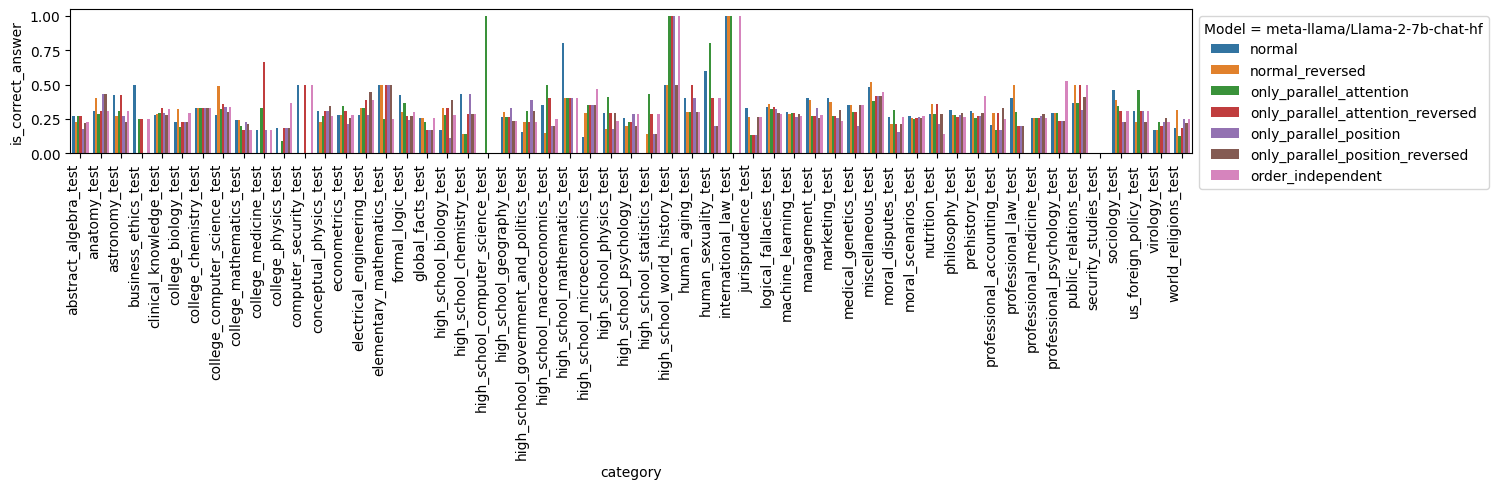

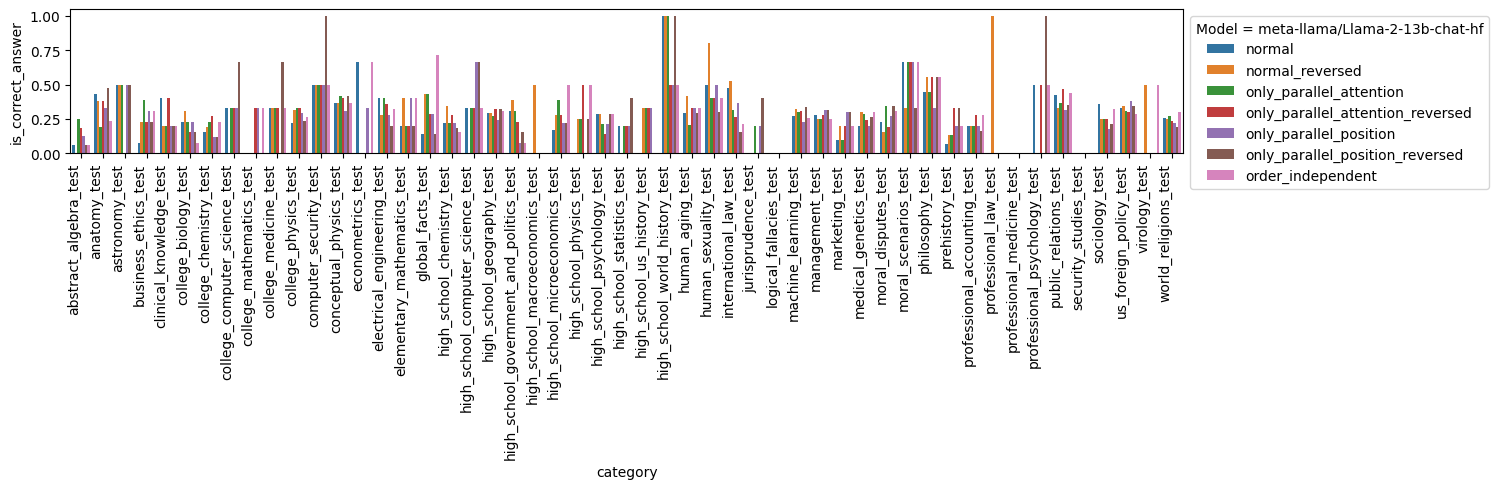

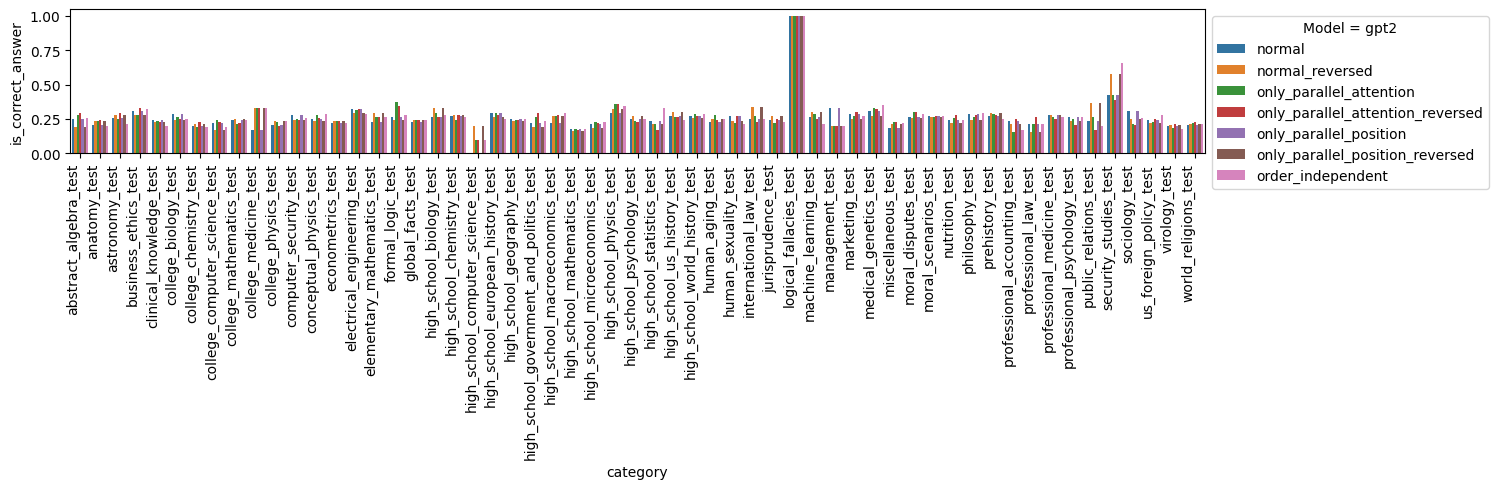

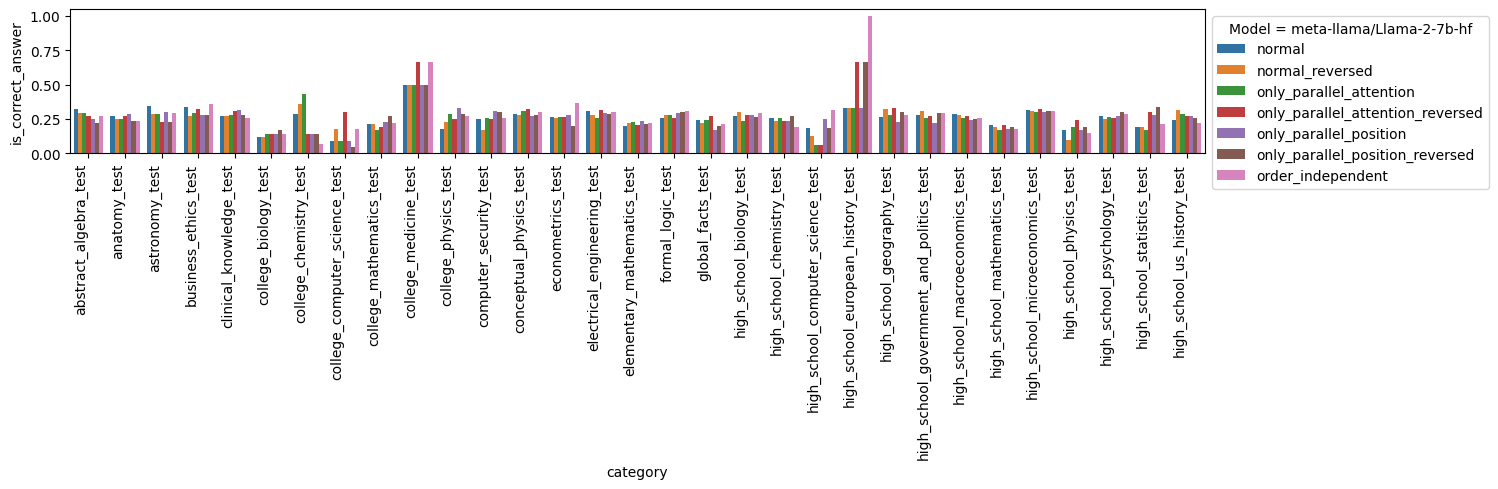

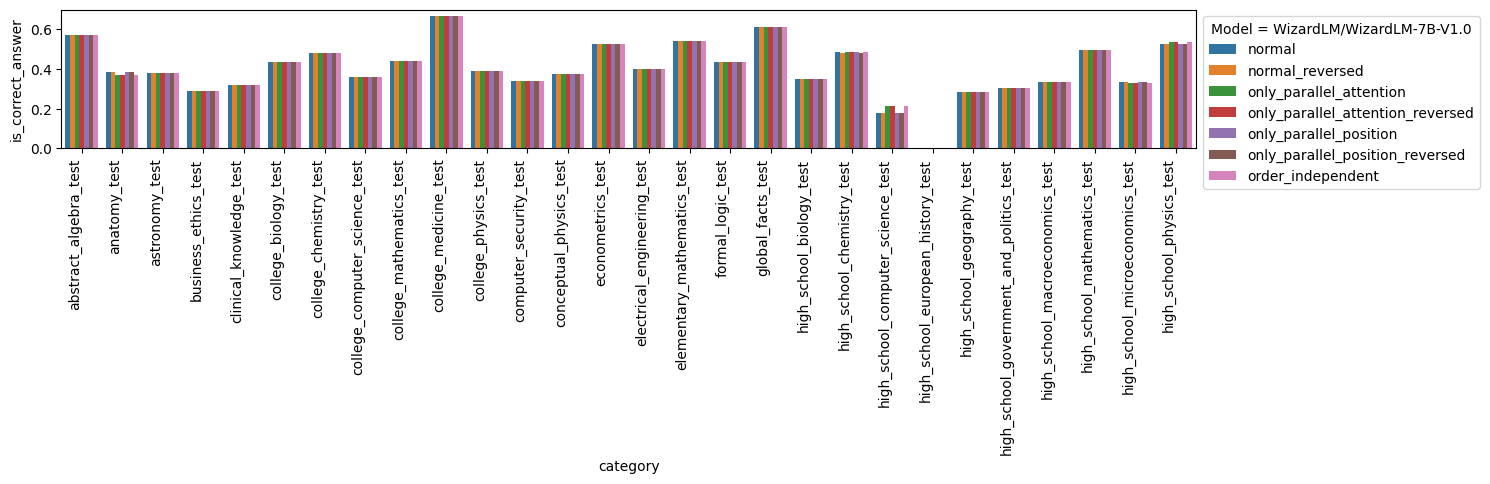

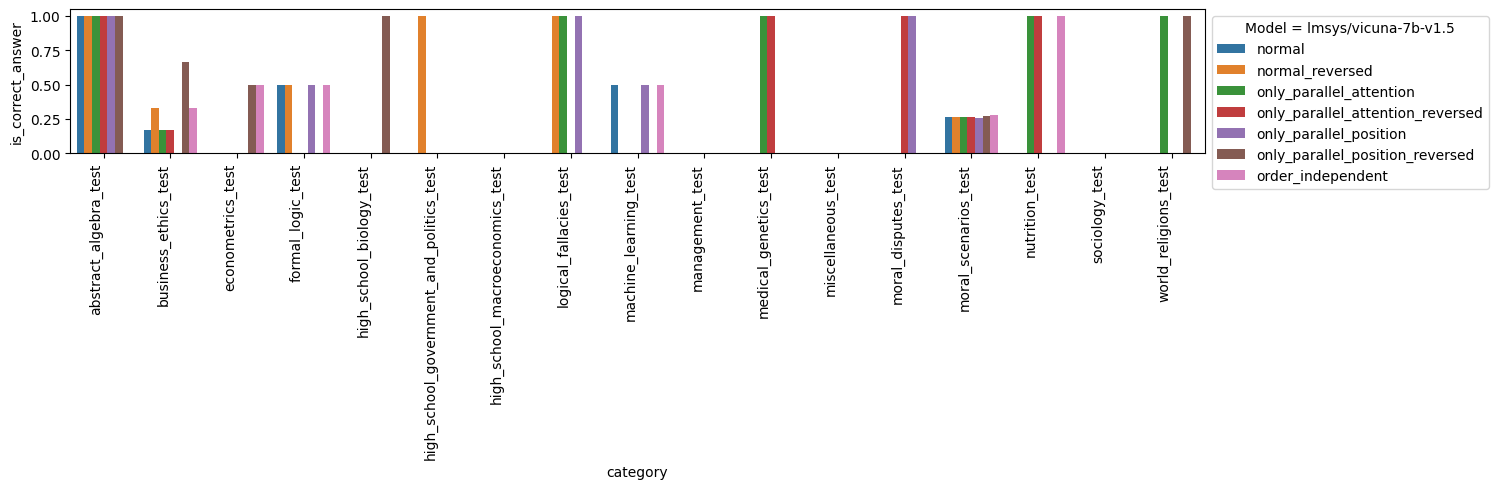

In [7]:
for model in df['model'].unique():
    df_piv_cat = df[df['model'] ==model][['model','is_correct_answer','response_type','category']].groupby(['model','response_type','category']).mean().reset_index().pivot(
        index = 'category',
        columns='response_type',
        values='is_correct_answer'
    )[['normal', 'order_independent', 'only_parallel_attention',
    'only_parallel_position']]
    with open(f"tables/MMLU-results-cat-{model.replace('/','_')}.tex" , 'wt') as f:
        f.write(df_piv_cat.to_latex(
            float_format = "%.3f",
            escape=True
        ).replace("response_type", "response\_type").replace("\_test", ""))
    fig, ax  = plt.subplots(figsize = (15,5))
    seaborn.barplot(
        hue = 'response_type',
        x = 'category',
        y ='is_correct_answer',
        data = df[df['model'] ==model][['model','is_correct_answer','response_type','category']].groupby(['model','response_type','category']).mean().reset_index(),
        ax = ax
    )
    #ax.set_ylim([.1,.5])
    ax.set_xticklabels([l._text.split('/')[-1] for l in ax.get_xticklabels()], rotation=90, ha='right')
    ax.legend(
        title = f'Model = {model}',bbox_to_anchor=(1,1),loc = 'upper left')
    fig.tight_layout()
    plt.savefig(f"./images/mmlu_accuracy_cat_{model.replace('/','_')}.pdf", )

In [35]:
df['model'].unique()

array(['meta-llama/Llama-2-13b-hf', 'meta-llama/Llama-2-7b-chat-hf',
       'meta-llama/Llama-2-13b-chat-hf', 'gpt2',
       'meta-llama/Llama-2-7b-hf', 'WizardLM/WizardLM-7B-V1.0',
       'lmsys/vicuna-7b-v1.5'], dtype=object)

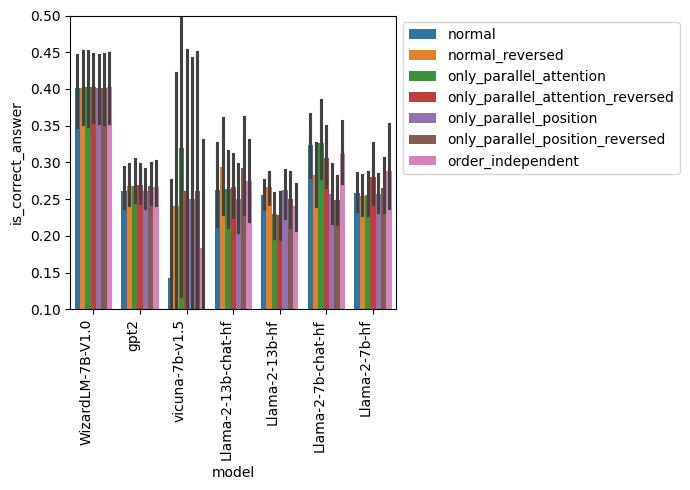

In [8]:
fig, ax  = plt.subplots(figsize = (7,5))
seaborn.barplot(
    hue = 'response_type',
    x = 'model',
    y ='is_correct_answer',
    data = df[['model','is_correct_answer','response_type','category']].groupby(['model','response_type', 'category']).mean().reset_index(),
    ax = ax
)

ax.set_ylim([.1,.5])
ax.set_xticklabels([l._text.split('/')[-1] for l in ax.get_xticklabels()], rotation=90, ha='right')
ax.legend(bbox_to_anchor=(1,1),loc = 'upper left')
fig.tight_layout()
plt.savefig('./images/mmlu_accuracy_bars.pdf', )

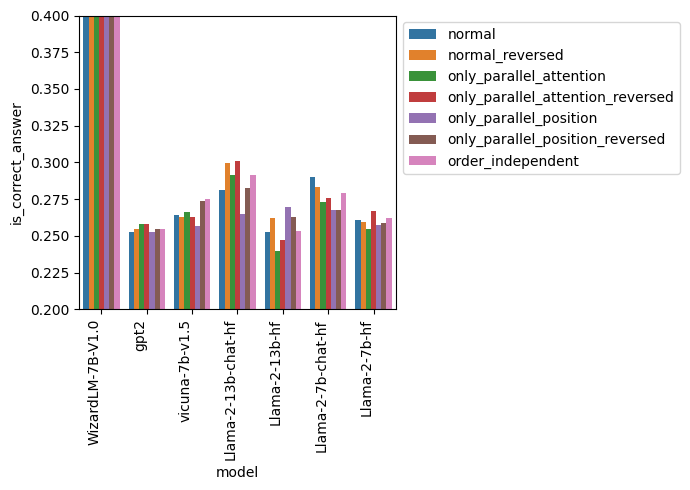

In [9]:
fig, ax  = plt.subplots(figsize = (7,5))
seaborn.barplot(
    hue = 'response_type',
    x = 'model',
    y ='is_correct_answer',
    data = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index(),
    ax = ax
)

ax.set_ylim([.2,.4])
ax.set_xticklabels([l._text.split('/')[-1] for l in ax.get_xticklabels()], rotation=90, ha='right')
ax.legend(bbox_to_anchor=(1,1),loc = 'upper left')
fig.tight_layout()
plt.savefig('./images/mmlu_accuracy.pdf', )

In [10]:
df_piv = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index().pivot(
    index = 'model',
    columns='response_type',
    values='is_correct_answer'
)[['normal', 'order_independent', 'normal_reversed', 'only_parallel_attention',
       'only_parallel_attention_reversed', 'only_parallel_position',
       'only_parallel_position_reversed']]
df_piv

response_type,normal,order_independent,normal_reversed,only_parallel_attention,only_parallel_attention_reversed,only_parallel_position,only_parallel_position_reversed
model,,,,,,,
WizardLM/WizardLM-7B-V1.0,0.405479,0.405252,0.405252,0.405252,0.405252,0.405479,0.405252
gpt2,0.252523,0.254852,0.254464,0.258055,0.257958,0.252523,0.254464
lmsys/vicuna-7b-v1.5,0.264130,0.275000,0.263043,0.266304,0.263043,0.256522,0.273913
meta-llama/Llama-2-13b-chat-hf,0.281467,0.291378,0.299306,0.291378,0.301288,0.264618,0.282458
meta-llama/Llama-2-13b-hf,0.252420,0.253581,0.262485,0.240031,0.247387,0.269454,0.262873
meta-llama/Llama-2-7b-chat-hf,0.290136,0.279252,0.283333,0.273129,0.275850,0.267347,0.267687
meta-llama/Llama-2-7b-hf,0.260683,0.262039,0.259552,0.254352,0.267239,0.257291,0.259100


In [11]:
with open("tables/MMLU-results.tex" , 'wt') as f:
    f.write(df_piv[['normal', 'order_independent', 'normal_reversed']].to_latex(
        float_format = "%.3f",
        escape=True
    ).replace("response_type", "response\_type"))
    
with open("tables/MMLU-results-variations1.tex" , 'wt') as f:
    f.write(df_piv[['normal', 'order_independent', 'only_parallel_attention',
       'only_parallel_attention_reversed',]].to_latex(
        float_format = "%.3f",
        escape=True
    ).replace("response_type", "response\_type"))
with open("tables/MMLU-results-variations2.tex" , 'wt') as f:
    f.write(df_piv[['normal', 'order_independent', 'only_parallel_position',
       'only_parallel_position_reversed',]].to_latex(
        float_format = "%.3f",
        escape=True
    ).replace("response_type", "response\_type"))
    

In [14]:
df_piv_cat = df[df['model'] != 'lmsys/vicuna-7b-v1.5'][['model','is_correct_answer','response_type','category']].groupby(['model','response_type','category'
                                                                                                                         ]).count().reset_index().pivot(
    index = ['category','model'],
    columns='response_type',
    values='is_correct_answer'
)[['normal', 'order_independent', 'normal_reversed', 'only_parallel_attention',
       'only_parallel_attention_reversed', 'only_parallel_position',
       'only_parallel_position_reversed']]
df_piv_cat.iloc[:20]

response_type                                         normal  \
category              model                                    
abstract_algebra_test WizardLM/WizardLM-7B-V1.0          100   
                      gpt2                               100   
                      meta-llama/Llama-2-13b-chat-hf      16   
                      meta-llama/Llama-2-13b-hf          100   
                      meta-llama/Llama-2-7b-chat-hf      100   
                      meta-llama/Llama-2-7b-hf           100   
anatomy_test          WizardLM/WizardLM-7B-V1.0          135   
                      gpt2                               135   
                      meta-llama/Llama-2-13b-chat-hf      21   
                      meta-llama/Llama-2-13b-hf          135   
                      meta-llama/Llama-2-7b-chat-hf       42   
                      meta-llama/Llama-2-7b-hf           135   
astronomy_test        WizardLM/WizardLM-7B-V1.0          152   
                      gpt2                               152   
                      meta-llama/Llama-2-13b-chat-hf       2   
                      meta-llama/Llama-2-13b-hf          152   
                      meta-llama/Llama-2-7b-chat-hf       26   
                      meta-llama/Llama-2-7b-hf            92   
business_ethics_test  WizardLM/WizardLM-7B-V1.0          100   
                      gpt2                               100   

response_type                                         order_independent  \
category              model                                               
abstract_algebra_test WizardLM/WizardLM-7B-V1.0                     100   
                      gpt2                                          100   
                      meta-llama/Llama-2-13b-chat-hf                 16   
                      meta-llama/Llama-2-13b-hf                     100   
                      meta-llama/Llama-2-7b-chat-hf                 100   
                      meta-llama/Llama-2-7b-hf                      100   
anatomy_test          WizardLM/WizardLM-7B-V1.0                     135   
                      gpt2                                          135   
                      meta-llama/Llama-2-13b-chat-hf                 21   
                      meta-llama/Llama-2-13b-hf                     135   
                      meta-llama/Llama-2-7b-chat-hf                  42   
                      meta-llama/Llama-2-7b-hf                      135   
astronomy_test        WizardLM/WizardLM-7B-V1.0                     152   
                      gpt2                                          152   
                      meta-llama/Llama-2-13b-chat-hf                  2   
                      meta-llama/Llama-2-13b-hf                     152   
                      meta-llama/Llama-2-7b-chat-hf                  26   
                      meta-llama/Llama-2-7b-hf                       92   
business_ethics_test  WizardLM/WizardLM-7B-V1.0                     100   
                      gpt2                                          100   

response_type                                         normal_reversed  \
category              model                                             
abstract_algebra_test WizardLM/WizardLM-7B-V1.0                   100   
                      gpt2                                        100   
                      meta-llama/Llama-2-13b-chat-hf               16   
                      meta-llama/Llama-2-13b-hf                   100   
                      meta-llama/Llama-2-7b-chat-hf               100   
                      meta-llama/Llama-2-7b-hf                    100   
anatomy_test          WizardLM/WizardLM-7B-V1.0                   135   
                      gpt2                                        135   
                      meta-llama/Llama-2-13b-chat-hf               21   
                      meta-llama/Llama-2-13b-hf                   135   
                      meta-llama/Llama-2-7b-chat-hf             

In [16]:
df_piv_cat = df[df['model'] != 'lmsys/vicuna-7b-v1.5'][['model','is_correct_answer','response_type','category']].groupby(['model','response_type','category']).mean().reset_index().pivot(
    index = ['category','model'],
    columns='response_type',
    values='is_correct_answer'
)[['normal', 'order_independent', 'normal_reversed', 'only_parallel_attention',
       'only_parallel_attention_reversed', 'only_parallel_position',
       'only_parallel_position_reversed']]
df_piv_cat.iloc[:20]

response_type                                           normal  \
category              model                                      
abstract_algebra_test WizardLM/WizardLM-7B-V1.0       0.570000   
                      gpt2                            0.250000   
                      meta-llama/Llama-2-13b-chat-hf  0.062500   
                      meta-llama/Llama-2-13b-hf       0.240000   
                      meta-llama/Llama-2-7b-chat-hf   0.270000   
                      meta-llama/Llama-2-7b-hf        0.320000   
anatomy_test          WizardLM/WizardLM-7B-V1.0       0.385185   
                      gpt2                            0.207407   
                      meta-llama/Llama-2-13b-chat-hf  0.428571   
                      meta-llama/Llama-2-13b-hf       0.222222   
                      meta-llama/Llama-2-7b-chat-hf   0.309524   
                      meta-llama/Llama-2-7b-hf        0.274074   
astronomy_test        WizardLM/WizardLM-7B-V1.0       0.381579   
                      gpt2                            0.256579   
                      meta-llama/Llama-2-13b-chat-hf  0.500000   
                      meta-llama/Llama-2-13b-hf       0.296053   
                      meta-llama/Llama-2-7b-chat-hf   0.423077   
                      meta-llama/Llama-2-7b-hf        0.347826   
business_ethics_test  WizardLM/WizardLM-7B-V1.0       0.290000   
                      gpt2                            0.310000   

response_type                                         order_independent  \
category              model                                               
abstract_algebra_test WizardLM/WizardLM-7B-V1.0                0.570000   
                      gpt2                                     0.260000   
                      meta-llama/Llama-2-13b-chat-hf           0.062500   
                      meta-llama/Llama-2-13b-hf                0.220000   
                      meta-llama/Llama-2-7b-chat-hf            0.230000   
                      meta-llama/Llama-2-7b-hf                 0.270000   
anatomy_test          WizardLM/WizardLM-7B-V1.0                0.370370   
                      gpt2                                     0.200000   
                      meta-llama/Llama-2-13b-chat-hf           0.238095   
                      meta-llama/Llama-2-13b-hf                0.266667   
                      meta-llama/Llama-2-7b-chat-hf            0.309524   
                      meta-llama/Llama-2-7b-hf                 0.237037   
astronomy_test        WizardLM/WizardLM-7B-V1.0                0.381579   
                      gpt2                                     0.217105   
                      meta-llama/Llama-2-13b-chat-hf           0.000000   
                      meta-llama/Llama-2-13b-hf                0.236842   
                      meta-llama/Llama-2-7b-chat-hf            0.307692   
                      meta-llama/Llama-2-7b-hf                 0.293478   
business_ethics_test  WizardLM/WizardLM-7B-V1.0                0.290000   
                      gpt2                                     0.320000   

response_type                                         normal_reversed  \
category              model                                             
abstract_algebra_test WizardLM/WizardLM-7B-V1.0              0.570000   
                      gpt2                                   0.190000   
                      meta-llama/Llama-2-13b-chat-hf         0.000000   
                      meta-llama/Llama-2-13b-hf              0.220000   
                      meta-llama/Llama-2-7b-chat-hf          0.230000   
                      meta-llama/Llama-2-7b-hf               0.290000   
anatomy_test          WizardLM/WizardLM-7B-V1.0              0.385185   
                      gpt2                                   0.237037   
                      meta-llama/Llama-2-13b-chat-hf         0.380952   
                      meta-llama/Llama-2-13b-hf              0.274074   
                    

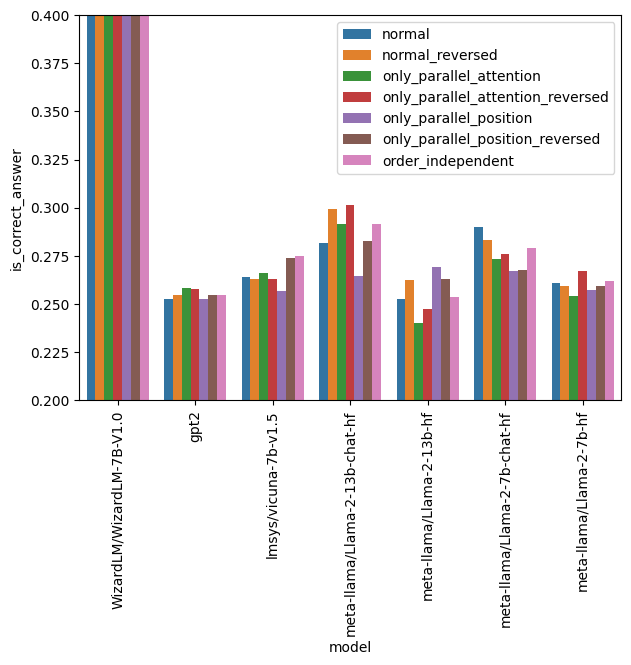

In [17]:
fig, ax  = plt.subplots(figsize = (7,5))
seaborn.barplot(
    hue = 'response_type',
    x = 'model',
    y ='is_correct_answer',
    data = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index(),
    ax = ax
)

ax.set_ylim([.2,.4])
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=(1,1))

In [18]:
df_piv.columns

Index(['normal', 'normal_reversed', 'only_parallel_attention',
       'only_parallel_attention_reversed', 'only_parallel_position',
       'only_parallel_position_reversed', 'order_independent'],
      dtype='object', name='response_type')

In [32]:
df[['is_correct_answer','correct_answer_prob', 'response_type']].groupby('response_type').mean()

,is_correct_answer,correct_answer_prob
response_type,,
normal,0.280360,0.259233
normal_reversed,0.275387,0.257972
only_parallel_attention,0.276535,0.258161
only_parallel_attention_reversed,0.279786,0.260779
only_parallel_position,0.276917,0.257968
only_parallel_position_reversed,0.270224,0.256323
order_independent,0.274240,0.253606


In [11]:
def load_to_dataframe(
    path: str
) -> pandas.DataFrame:
    lines =[]
    with open(path, "rt") as fin:
        for line_raw in fin:
            line_data = json.loads(line_raw)
            for response_type, response_data in line_data['responses'].items():

                line_dict = {
                'response_type': response_type,
                'prompt': line_data['prompt'],
                'model': line_data['model'],
                }
                line_dict.update(response_data)
                for key, value in line_data['prompt_metadata'].items():
                    line_dict[f"meta_{key}"] = value
                lines.append(line_dict)
    return pandas.DataFrame(lines)

In [18]:
df = load_to_dataframe("../results/mmlu/meta-llama_Llama-2-13b-hf-100/meta-llama_Llama-2-13b-hf-100-anatomy_test.jsonl")

In [19]:
df[['is_correct_answer','correct_answer_prob', 'response_type']].groupby('response_type').mean()

,is_correct_answer,correct_answer_prob
response_type,,
normal,0.222222,0.261701
normal_reversed,0.274074,0.272412
only_parallel_attention,0.259259,0.274929
only_parallel_attention_reversed,0.281481,0.268868
only_parallel_position,0.251852,0.274280
only_parallel_position_reversed,0.274074,0.275591
order_independent,0.266667,0.267847


In [17]:
df

,response_type,prompt,model,order_independent_output,pad_attention,text_output,is_correct_answer,correct_answer_prob,edit_position,edit_attention,meta_label,meta_incorrect_answers
0,normal,Which of the following methods of detecting br...,meta-llama/Llama-2-7b-hf,False,False,Mammography Explanation: Mammography is a m...,True,0.803383,False,False,Mammography,"[Needle aspiration, Mastectomy, Lumpectomy]"
1,normal_reversed,Which of the following methods of detecting br...,meta-llama/Llama-2-7b-hf,False,False,Mammography\nA 25-year-old woman presents to ...,True,0.805907,False,False,Mammography,"[Needle aspiration, Mastectomy, Lumpectomy]"
2,order_independent,Which of the following methods of detecting br...,meta-llama/Llama-2-7b-hf,True,False,2. Which of the following is a risk factor for...,False,0.232302,True,True,Mammography,"[Needle aspiration, Mastectomy, Lumpectomy]"
3,normal,"The regions of the body that, when touched, ar...",meta-llama/Llama-2-7b-hf,False,False,"2.\nThe regions of the body that, when touched...",False,0.016311,False,False,all of the above,"[vary from person to person, vary for women de..."
4,normal_reversed,"The regions of the body that, when touched, ar...",meta-llama/Llama-2-7b-hf,False,False,"1.\nThe regions of the body that, when touched...",False,0.013152,False,False,all of the above,"[vary from person to person, vary for women de..."
...,...,...,...,...,...,...,...,...,...,...,...,...
388,normal_reversed,Which of the following is NOT part of the inte...,meta-llama/Llama-2-7b-hf,False,False,"Dartos Muscle The dartos muscle is a thin, f...",True,0.510585,False,False,Dartos Muscle,"[Breast lobule, Lactiferous duct, Lactiferous ..."
389,order_independent,Which of the following is NOT part of the inte...,meta-llama/Llama-2-7b-hf,True,False,2. Which of the following is NOT part of the i...,False,0.160541,True,True,Dartos Muscle,"[Breast lobule, Lactiferous duct, Lactiferous ..."
390,normal,"Over the past several decades, attitudes towar...",meta-llama/Llama-2-7b-hf,False,False,2\n10. Which of the following is NOT a reason ...,True,0.497874,False,False,become more more permissive; become less accep...,"[remained constant; remained constant, become ..."
391,normal_reversed,"Over the past several decades, attitudes towar...",meta-llama/Llama-2-7b-hf,False,False,2\n10. Which of the following is true of the r...,True,0.503508,False,False,become more more permissive; become less accep...,"[remained constant; remained constant, become ..."


In [2]:
df = pandas.read_json("../test.json",lines=True)

In [3]:
df

,prompt,model,prompt_metadata,responses
0,Which of the following methods of detecting br...,meta-llama/Llama-2-7b-hf,"{'label': 'Mammography', 'incorrect_answers': ...","{'normal': {'order_independent_output': False,..."
1,"The regions of the body that, when touched, ar...",meta-llama/Llama-2-7b-hf,"{'label': 'all of the above', 'incorrect_answe...","{'normal': {'order_independent_output': False,..."
2,Which of the following is/are true of gonorrhe...,meta-llama/Llama-2-7b-hf,"{'label': 'can be treated with antibiotics', '...","{'normal': {'order_independent_output': False,..."
3,"You are a homosexual male: Last night, you wer...",meta-llama/Llama-2-7b-hf,"{'label': 'the id', 'incorrect_answers': ['the...","{'normal': {'order_independent_output': False,..."
4,Sociobiologists believe that there are more ma...,meta-llama/Llama-2-7b-hf,{'label': 'evolutionary selection has favored ...,"{'normal': {'order_independent_output': False,..."
...,...,...,...,...
126,In men gonorrhea and chlamydia most often infe...,meta-llama/Llama-2-7b-hf,"{'label': 'urethra', 'incorrect_answers': ['pe...","{'normal': {'order_independent_output': False,..."
127,Which method of abortion is most costly and ca...,meta-llama/Llama-2-7b-hf,"{'label': 'hysterotomy', 'incorrect_answers': ...","{'normal': {'order_independent_output': False,..."
128,Miss Jones has been concerned about her health...,meta-llama/Llama-2-7b-hf,"{'label': 'pubic lice', 'incorrect_answers': [...","{'normal': {'order_independent_output': False,..."
129,Which of the following is NOT part of the inte...,meta-llama/Llama-2-7b-hf,"{'label': 'Dartos Muscle', 'incorrect_answers'...","{'normal': {'order_independent_output': False,..."


In [5]:
for mtype in df['responses'].iloc[0].keys():
    df[mtype] = df['responses'].apply(lambda x: x[mtype]['is_correct_answer'])

In [10]:
df['normal'].mean()

0.3053435114503817

In [11]:
df['order_independent'].mean()

0.25190839694656486